In [1]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data, vertical_data

# sets random seed to 0
# Sets dtype default to float32
# overrides np.dot()
# nnfs.init()

import matplotlib.pyplot as plt
import math

# Notes on Neural Networks from Scratch

## Data
### Feature 
- A single measurable property of phenomena that can be used for predictions or classifications.
- Usually Numeric. Features usually must be converted/encoded to numeric values to be used with ML algorithms.
- Can sometimes be combined to create new features. 
- Should be informative and relevant to the task.
- Deep neural networks can learn complex relationships between features, including interactions and non-linear relationships. Thus eliminating the need for manual feature engineering.
### Preprocessing Data - Adjusting feature data to be suitable for an algorithm.
- Encoding
- Normalization
- Scaling
### Feature Set 
- Group of features. 
- Represented as vectors.
### Sample 
- An instance of a feature set. One "Row", one observation.
### Batch 
- Group of samples.
- Separated used to train with parallel processing.
- Batching helps prevent overfitting. See [this](https://nnfs.io/vyu/) animation
### In-Sample Data 
- Training Data
### Out-Of-Sample Data 
- Testing/Validation Data
### Generalization 
- "Generalizing" the model to work well on never-before-seen input. 
### Overfitting 
- When a model "memorizes" a dataset and looks for "too-specific" features 
### Training 
- Slowly adjusting the weights/biases of a model to obtain the desired output.
### Tabular Data 
- Features can be given in any order, data in a table.
### Forward Pass 
- When we pass data through a model from beginning to end.
- Data passes through neurons, then the activation function then the next layer & activation function...etc
- 1 Neuron: Activation_function(sum(inputs * weights*) + bias))

## Model Types
### Classification 
- Predict discrete labels/targets
- Binary Classification: Predicts one of two targets
- Multiclass Classification: Predicts one of 3+ targets

#### One-hot Array
- An array for classification where one value in array is 1 and the rest are 0
- Used where targets are 2+ dimensions

#### Sparse Array
- An array for classification where the numbers are the correct class numbers (1=dog, 2=cat) etc
- Used where targets are a 1D array

### Regression 
- Predict numeric values   
- Multivariate Regression: Predicts multiple numeric values

## Layers
### Input Layer 
- Actual input data, typically preprocessed.
### Output Layer 
- What the neural network returns
- Often has as many neurons as the training dataset has classes.
### Hidden Layer 
- A layer of neurons located between the input layer and the output layer

## Linear Combination
### Equation: 
* ```Input * Weight + Bias = Output```
* Inputs * Weights (Connections) + bias (per neuron)
### Weight 
- A trainable factor of how much of the input to use. 
- Multiplied by the input value to determine how much of that input signal contributes to the output.
- Present in each *connection* between neurons.
- Weights are initially random, then are adjusted based on how far the actual output is from the desired output.
    - In the case of pretrained models weights are initialized with whatever the pretrained model finished with.
- Each connection in a neural network has a unique weight.
- Weights can be positive or negative.
- After all input * weight values are taken they are summed and added to the bias.
### Bias 
- A constant added to the weighted sum of inputs which changes a neuron's activation threshold.
- Present in each neuron itself.
- Allows control of neuron activation threshold independent of the input values.
- Higher bias needs stronger signal for neuron to fire, lower bias means it will fire at a weaker signal
- Initially random/0, then are adjusted based on how far the actual output is from the desired output.

In [2]:
# Example Inputs
inputs_vector = [1.0, 2.0, 3.0, 2.5]

# Random Weights
weights_vector = [0.2, 0.8, -0.5, 1.0]

# Random Bias
bias = 2.0

# Get output for inputs to a single neuron
def single_neuron_output(inputs, weights, bias):
    # sum of inputs * weight
    weighted_sum = sum(inputs[i] * weights[i] for i in range(len(inputs)))
    # add bias
    output = weighted_sum + bias
    return output
    
single_neuron_output(inputs_vector, weights_vector, bias)

4.8

In [3]:
inputs_vector = [1.0, 2.0, 3.0, 2.5]

# Matrix of weights instead of vector. (3, 4) = 3 neurons, 4 inputs
weights_matrix = [[0.2, 0.8, -0.5, 1.0],
                  [0.5, -0.91, 0.26, -0.5],
                  [-0.26, -0.27, 0.17, 0.87]]

# 3 neuron biases
biases = [2.0, 3.0, 0.5]

# Get output for inputs of a single layer
def single_layer_output(inputs, weights, biases):
    # input * weight + bias for each row
    outputs = [single_neuron_output(inputs, weights[i], biases[i]) for i in range(len(weights))]
    return outputs

single_layer_output(inputs_vector, weights_matrix, biases)

[4.8, 1.21, 2.385]

## Vectors, Matrices, Tensors

### Array 
- Homologous container. Homo - Same, Logos - Proportions/Ratios. Consistent in both dimensions. 
### Vector 
- Linear array; One dimensional array
- [1, 2, 3]
#### Row Vector 
- An array with the shape (1, n)

In [4]:
# Row Vector (1,3)
a = [1, 2, 3]

In [5]:
# Make a into a 2d row array
np.expand_dims(a, axis=0)

array([[1, 2, 3]])

In [6]:
# Make a into a 2d row array
np.array([a])

array([[1, 2, 3]])

#### Column Vector 
- An array with the shape (n, 1)

In [7]:
# Make a into a 2d column array
np.expand_dims(a, axis=1)

array([[1],
       [2],
       [3]])

In [8]:
# Transpose a into a column array
np.array([a]).T

array([[1],
       [2],
       [3]])

### Tensor 
- Object that can be represented as an array

### Three dimensional array

In [9]:
np.array([[[1, 2, 3],
          [4, 5, 6]],
         [[7, 8, 9],
          [10, 11, 12]],
         [[13, 14, 15],
          [16, 17, 18]]])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

### Matrix 
- Two dimensional Array

In [10]:
np.array([[1, 2, 3],
          [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

### Dot Product 
- Sum of the product of consecutive vector elements
- ```sum(v1[i] * v2[i] for in in range(len(v1)]```
- ```sum(inputs[i] * weights[i] for in in range(len(inputs)]```
- ```np.dot(inputs, weights)```
- Both vectors must be the same size

In [11]:
# Example Inputs
inputs_vector = [1.0, 2.0, 3.0, 2.5]

# Random Weights
weights_vector = [0.2, 0.8, -0.5, 1.0]

# Random Bias
bias = 2.0

# Using NumPy dot product to get single neuron output
output = np.dot(inputs_vector, weights_vector) + bias
output

4.8

### Matrix + vector
- Add vector to all rows/columns of matrix depending on if row/column vector
- Column vector must be same length as matrix column
- Row vector must be same length as matrix row

In [12]:
a = [1, 2, 3]
a

[1, 2, 3]

In [13]:
B = np.zeros([3, 3])
B

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
B + np.asarray([a])

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [15]:
B + np.asarray([a]).T

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

### Matrix Product 
- The dot product of all combinations of rows of a first matrix (A) and columns of a second matrix (B).
- For a matrix A with dimensions x, y and a matrix B with dimensions n, m y must equal n to perform matrix product.
- A(x, y) & B(n, m) y == n
- Results in a Matrix C(x, m)
- The dot product of two vectors = a matrix product of a row and column vector.
### Transposition 
- Changing a matrix A(x, y) to Matrix A(y, x). Flipping the columns into rows and rows into columns.
- Transposing weights matrix allows us to take matrix product

In [16]:
# Using numpy to get Matrix Product - transposing weights
# Matrix of inputs requires matrix product
inputs_matrix = [[1.0, 2.0, 3.0, 2.5],
                 [2.0, 5.0, -1.0, 2.0],
                 [-1.5, 2.7, 3.3, -0.8]]

# Random Weights
weights_matrix = [[0.2, 0.8, -0.5, 1.0],
                  [0.5, -0.91, 0.26, -0.5],
                  [-0.26, -0.27, 0.17, 0.87]]

# Random Biases
biases = [2.0, 3.0, 0.5]

# numpy converts biases to array by itself
outputs = np.dot(inputs_matrix, np.asarray(weights_matrix).T) + biases
outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

## Adding a Layer

In [17]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

# weights for input connections to second layer
weights2 = [[0.1, -0.14, -0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

# biases per neuron for second layer
biases2 = [-1.0, -2.0, -0.5]

layer1_outputs = np.dot(inputs, np.asarray(weights).T) + biases
layer1_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [18]:
# layer 2 takes layer one's output as input
layer2_outputs = np.dot(layer1_outputs, np.asarray(weights2).T) + biases2
layer2_outputs

array([[-1.8819 , -5.04185, -2.03875],
       [ 0.0434 , -6.7332 , -5.7633 ],
       [-1.01914, -2.58746, -0.35655]])

## Spiral Data

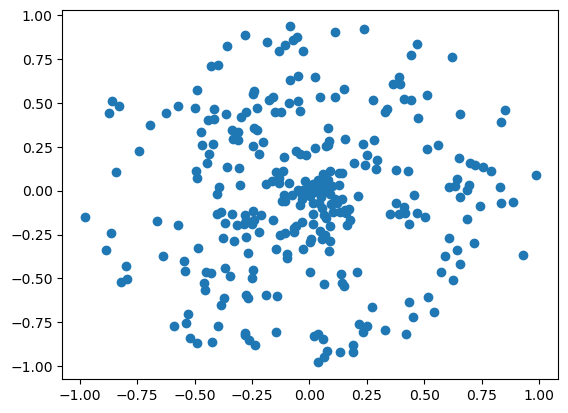

In [19]:
# non-linear data is difficult for ML algorithms to identify patterns
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1])

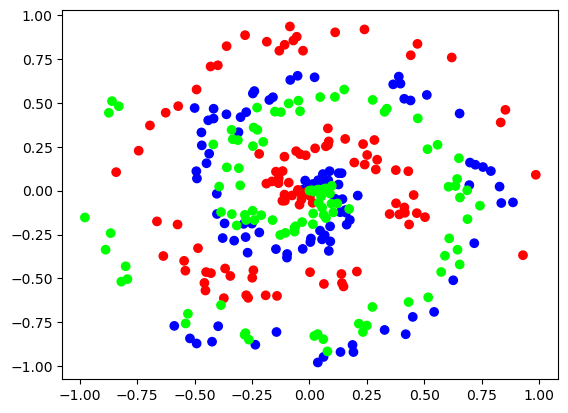

In [20]:
# show the pattern
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')

## Neurons
* Dead Neuron - When a neuron's output is 0 and that keeps getting fed to new neurons which produce zero making the model untrainable.

## Network/Layer Types
* Dense/Fully Connected  Layer - Every neuron in each layer is connected to every neuron of the next layer.
    - Each connection has a weight associated with it.


In [21]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        # Initialize Weights & Biases
        # set weights to be shape (n_inputs, n_neurons) so Matrix Product can be taken easily 
        # multiply by .01 to initialize non-zero weights small enough to minimize influence on training
        self.weights = .01 * np.random.randn(n_inputs, n_neurons)
        # one bias per neuron
        self.biases = np.zeros((1, n_neurons))
    
    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) +  self.biases

In [22]:
# spiral dataset again
# X = matrix of coordinates, y = class enum
X, y = spiral_data(samples=10, classes=3)

# 2 inputs, 3 neurons
dense1 = Layer_Dense(2, 3)
dense1.weights

array([[ 0.00979571, -0.00448032, -0.00129488],
       [ 0.00053727,  0.00554007,  0.007897  ]])

In [23]:
dense1.biases

array([[0., 0., 0.]])

In [24]:
dense1.forward(X)

In [25]:
# X.shape = (300, 2)
# dense1.weights.shape = (2, 3)
dense1.output.shape

(30, 3)

In [26]:
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.96334731e-04, -1.57240877e-05,  4.24445463e-04],
       [ 1.53045021e-03, -1.56484246e-03, -1.39335347e-03],
       [-2.25575569e-03, -4.35336056e-04, -1.72220572e-03],
       [-3.62414118e-03,  2.96810729e-03,  2.28386622e-03]])

## Activation Functions
- Fed the result of `input * weight + bias` resulting in whether the neuron should fire or not and the strength of the resulting signal.
-  Equation: output = input * weight + bias == y = mx + b. Output is linear. Activation functions alter output to be non-linear so more complex relationships can be discovered from data.
- NN have 2 types of activation functions in general. One for the hidden layers & one for the output layer. 
- Different activation functions have different properties like differentiability, vanishing/exploding gradient problems, and computational efficiency.
- Some activation functions work better for specific types of tasks or network architectures.
### Sigmoid
- Outputs a value between 0 and 1, representing a probability-like activation. 0 = negative infinity, .5 = 0, 1 = positive infinity. <br>
$y = \frac{1}{1+e^-x} $
### ReLU (Rectified Linear Unit)
- Outputs the input directly if it's positive, otherwise outputs 0.<br>
$f(x) = max(0, x) $
    - Output is unbounded, not normalized (can be anything) and exclusive (each output is independent 

In [27]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

# Create ReLU activation to be used with dense layer
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation function taking in output from previous layer
activation1.forward(dense1.output)

In [28]:
activation1.output[:4]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16134860e-04, 1.37353175e-04, 0.00000000e+00],
       [2.19853551e-04, 2.85696452e-04, 0.00000000e+00],
       [1.76200764e-04, 3.90018120e-04, 6.87166286e-05]])

### Tanh (Hyperbolic Tangent)
- Outputs a value between -1 and 1, similar to sigmoid but with a steeper slope around zero.
### Softmax Activation Function 
- Meant for classification.
- Produces a normalized distribution of probabilities for classes.
- Returns confidence scores
- <font size=5>$ S_{i,j} = \frac{e^{x_{i,j}}}{\sum_{l=1}^{n} e^{x_{i,l}}} $</font>
    - x = output value
    - i = index of current sample
    - j = value current sample (the output)
- Numerator: $e^x$ any x you still get a positive value, so you never get a negative value for confidence + higher input values = higher output values so it won't change the predicted class.
- Divide it by the sum of all values to get the normalized values; probability distribution

In [29]:
# sample layer outputs
layer_outputs = [4.8, 1.21, 2.385]

# Step One: raise e to output for each output
# softmax_numerator = [math.e ** i for i in layer_outputs]

# np.exp does e^each output
softmax_numerator = np.exp(layer_outputs)
softmax_numerator

array([121.51041752,   3.35348465,  10.85906266])

In [30]:
# Step Two:
# Get sum of all values 
# softmax_denominator = sum(softmax_numerator)
softmax_denominator = np.sum(softmax_numerator)
softmax_denominator

135.7229648362044

In [31]:
# Step Three: Divide each output by sum to get probability
# normalized_outputs = [softmax_numerator/softmax_denominator for i in softmax_numerator]
normalized_outputs = softmax_numerator / softmax_denominator
normalized_outputs

array([0.89528266, 0.02470831, 0.08000903])

In [32]:
# Should add to ~1
sum(normalized_outputs)

0.9999999999999999

In [33]:
# matrix of inputs to activation function (outputs of linear combination)
inputs = [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]

# get e^all inputs
exp_vals = np.exp(inputs)

# get probability distribution output per neuron
probabilities = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
probabilities

array([[0.18036721, 0.32865048, 0.08956771, 0.4014146 ],
       [0.41690107, 0.1017836 , 0.327946  , 0.15336933],
       [0.1509898 , 0.14948743, 0.23211021, 0.46741256]])

In [34]:
class Activation_Softmax:
    
    # define forward pass
    def forward(self, inputs):
        # Subtract max to help prevent overflow errors (exploding values)
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                        keepdims=True))
        # Normalize for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                        keepdims=True)
        self.output = probabilities

## Loss Function
- AKA Cost function
- Algorithm that quantifies how wrong a model is.
### Loss
- Model's error, so the lower the better
### Categorical Cross-Entropy
- Used to compare a "ground-truth" probability (target, y) and predicted distribution (prediction, $\hat y$)<br>
$L_i = -\sum y_{i,j} \log (\hat y_{i,j})$
* $i$ - index of sample
* $j$ - value of sample at index $i$
* $L$ - Loss value of sample at index $i$
* $\hat y$ - predicted value
* The higher the confidence score, the lower the loss value $\log (1) = 0$
* $\log_e(y)$, $e^x = y$

In [35]:
# Example output of softmax activation function
softmax_output = [0.7, 0.1, 0.2]

# Example target
target_output = [1, 0, 0]

# Negative sum of target * log(prediction)
loss = -sum(target_output[i] * math.log(softmax_output[i]) for i in range(len(softmax_output)))
loss

0.35667494393873245

In [36]:
# Since non-true-target indices will always be zero, no need to include them
target_index = 0
loss = -target_output[target_index] * math.log(softmax_output[target_index])
loss

0.35667494393873245

In [37]:
# Since target output is always 1, no need to multiply the prediction by it
loss = -math.log(softmax_output[target_index])
loss

0.35667494393873245

In [38]:
# Example softmax output matrix
# Probabilities for 3 samples
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]

# 0, 1, 2 are the indices, class targets become the values for the indices referenced
softmax_outputs[[0, 1, 2], class_targets]

array([0.7, 0.5, 0.9])

In [39]:
# get the negative log of the predictions using class targets to index softmax outputs
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])

# Calculate the mean loss using np.mean to get average of array
average_loss = np.mean(neg_log)
average_loss

0.38506088005216804

In [40]:
# Example softmax output matrix
# Probabilities for 3 samples
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([[0, 1, 1],
                          [0, 1, 0],
                          [0, 1, 0]])

# If array is 1D, thus sparse (categorical)
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[range(len(softmax_outputs)), class_targets]
# If array is 2D, thus one hot encoded
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(softmax_outputs * class_targets, axis=1)
    
# get the negative log of the predictions
neg_log = -np.log(correct_confidences)

# Calculate the mean loss 
average_loss = np.mean(neg_log)
average_loss

0.6674935001812359

In [41]:
class Loss:
    
    # Calculate data & regularization loss given model output & ground truth vals
    def calculate(self, output, y):
        
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        
        return data_loss

In [42]:
class Loss_CategoricalCrossEntropy(Loss):
    
    # Forward Pass
    def forward(self, y_pred, y_true):
        
        # Number of samples in a batch
        samples = len(y_pred)
        
        # clip prediction 
        # min - to avoid taking the log of 0 and having a value of -inf
        # max - to avoid log of 1 being negative/shifting confidence toward 1
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # If array is 1D, thus sparse (categorical)
        # Get predictions at indices indicated in y_true
        if len(class_targets.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
            
        # If array is 2D, thus one hot encoded
        # multiply prediction array by ground truth array & sum
        elif len(class_targets.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        # get the negative log of the predictions 
        neg_log_likelihoods = -np.log(correct_confidences)

        return neg_log_likelihoods
        

In [43]:
np.log(0)

C:\Users\chels\AppData\Local\Temp\ipykernel_28648\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [44]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([[0, 1, 1],
                          [0, 1, 0],
                          [0, 1, 0]])

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
loss

0.6674935001812359

## Accuracy
- How often the largest confidence is the correct class in fractional terms

In [45]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.5, 0.1, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])

# Calculate values along rows
predictions = np.argmax(softmax_outputs, axis=1)

# if one hot convert them
if len(class_targets) == 2:
    class_targets = np.argmax(class_targets, axis=1)
    
# True evaluates to 1 false to 0
accuracy = np.mean(predictions==class_targets)
accuracy

0.6666666666666666

## Optimization

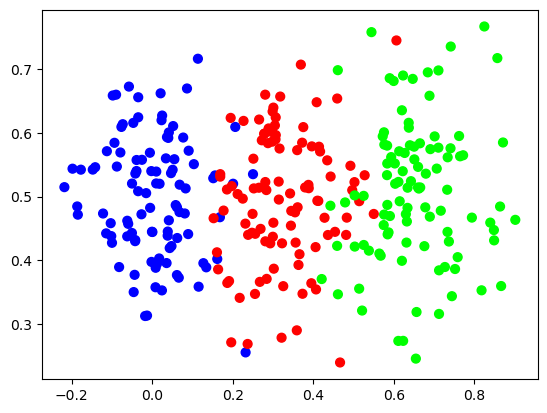

In [46]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')

In [47]:
# Initialize first hidden layer w/ 3 neurons
dense1 = Layer_Dense(2, 3)

# Initialize ReLU Activation Function
activation1 = Activation_ReLU()

# Initialize Second hidden layer w/ 3 neurons
dense2 = Layer_Dense(3, 3)

# Initialize Softmax Activation Function
activation2 = Activation_Softmax()

# Initialize loss function
loss_function = Loss_CategoricalCrossEntropy()

# Helper variables
lowest_loss = 9999999 # arbitrary large initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense1.biases.copy()

for i in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    
    # Forward pass of data through layers & activation functions
    dense1.forward(X)
    activation1.forward(dense1.output) #ReLU
    dense2.forward(activation1.output)
    activation2.forward(dense2.output) #softmax
    
    # get loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Get Accuracy for output of softmax & targets
    # Calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # if loss is less than current loss save values of weights/biases
    if loss < lowest_loss:
        print(f'New set of weights/biases found.\n Iteration: {i} loss: {loss} accuracy: {accuracy}')
        lowest_loss = loss
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense1.biases.copy()
    else:
        dense1.weights = best_dense1_weights
        dense1.biases = best_dense1_biases
        dense2.weights = best_dense2_weights
        dense1.biases = best_dense2_biases

New set of weights/biases found.
 Iteration: 0 loss: 1.0987515742707814 accuracy: 0.3333333333333333
New set of weights/biases found.
 Iteration: 1 loss: 1.0986276965400474 accuracy: 0.39666666666666667
New set of weights/biases found.
 Iteration: 2 loss: 1.0986100581368852 accuracy: 0.30333333333333334
New set of weights/biases found.
 Iteration: 3 loss: 1.0982565084923548 accuracy: 0.4766666666666667
New set of weights/biases found.
 Iteration: 4 loss: 1.0982557620084412 accuracy: 0.3333333333333333
New set of weights/biases found.
 Iteration: 16 loss: 1.0979071931971582 accuracy: 0.3333333333333333
New set of weights/biases found.
 Iteration: 17 loss: 1.0979010696558855 accuracy: 0.3333333333333333
New set of weights/biases found.
 Iteration: 28 loss: 1.0976903993758387 accuracy: 0.3333333333333333
New set of weights/biases found.
 Iteration: 109 loss: 1.0976808463657393 accuracy: 0.61
New set of weights/biases found.
 Iteration: 128 loss: 1.0975200311217201 accuracy: 0.333333333333

## NumPy 

### np.sum()

In [48]:
inputs = [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]

#### Sum All Dimensions

In [49]:
# axis = None: Sums in all dimensions
np.sum(inputs)

1.3599999999999999

#### Sum All Columns

In [50]:
# axis = 0: Sums all columns
np.sum(inputs, axis=0)

array([ 0.44, -0.38, -0.07,  1.37])

#### Sum All Rows

In [51]:
# axis = 1: Sums all rows
np.sum(inputs, axis=1)

array([ 1.5 , -0.65,  0.51])

### NumPy Indexing

In [52]:
matrix = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])

vector = [0, 1, 1]

# 0, 1, 2 are referencing indices, the vector become the values for the indices referenced
# for i in range(len(matrix)) get matrix[x][vector[x]]
matrix[[0, 1, 2], vector]

array([0.7, 0.5, 0.9])

### np.clip(a, a_min, a_max)
- a: input array for clipping
- a_min: values lower than a_min are replaced with this value.
    - Can be None
- a_max: values higher than a_max are replaced by a_max.
    - Can be None


### np.argmax(a, axis)
- a: input array to search for maximum
- axis: optional. None = all dimensions, 1=row, 0=column
- Returns index of max val ex [3, 6, 4] = 

In [53]:
# argmax per row
np.argmax([[3, 6, 4],
           [9, 1, 0]], axis=1, keepdims=True)

array([[1],
       [0]], dtype=int64)

In [54]:
# argmax per column
np.argmax([[3, 6, 4],
           [9, 1, 0]], axis=0, keepdims=True)

array([[1, 0, 0]], dtype=int64)

In [55]:
# argmax per column 2
np.argmax([[3, 6, 1],
           [9, 1, 4]], axis=0)

array([1, 0, 1], dtype=int64)

### np.arange(start, stop=None, step=1, dtype=None)
- range() but step can take decimals

## Calculus
### Tangent Line
- Created by drawing a line between 2 infinitely close points on a curve to get the instantaneous slope at that point

### Derivative
- Slope of the tangent line. Gives us the instantaneous rate of change for x. 
- This concept helps determine the effect of a specific weight/bias on the loss function given a sample.

### Numerical Differentiation/Numerical Derivative
- Calculating the slope of a tangent line using two infinitely close points

In [56]:
def f(x):
    return 2 * x**2

# change from x1 to x2
# choose a really small point that will still keep things numerically stable
p2_delta = 0.0001

x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

# get the derivative/slope
approximate_derivative = (y2 - y1)/(x2 - x1)
approximate_derivative

8.000199999998785

In [57]:
# get y intercept of tangent like with 2 points and the slope
b = y2 - approximate_derivative * x2
b

-8.00039999999757

In [58]:
def tangent_line(x):
    return approximate_derivative * x + b

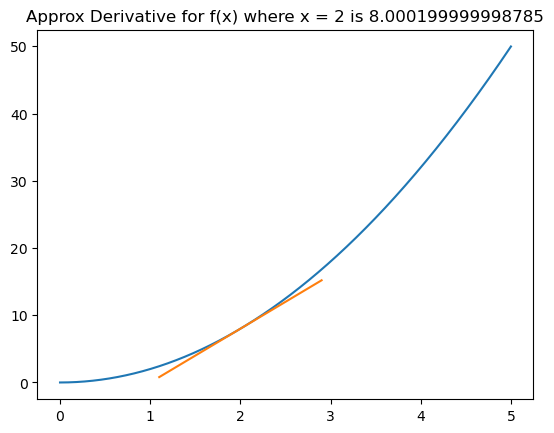

In [59]:
# arange gives a smooth line
x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x, y)

to_plot = [x1 - 0.9, x1, x1 + 0.9]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])
plt.title(f"Approx Derivative for f(x) where x = {x1} is {approximate_derivative}")
plt.show()

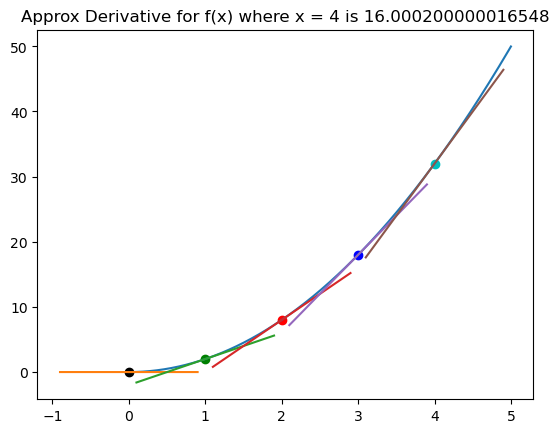

In [60]:
# arange gives a smooth line
x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x, y)
colors = ['k', 'g', 'r', 'b', 'c']

def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative * x) + b

for i in range(5):
    p2_delta = 0.0001

    x1 = i
    x2 = x1 + p2_delta

    y1 = f(x1)
    y2 = f(x2)

    approximate_derivative = (y2 - y1)/(x2 - x1)
    b = y2 - approximate_derivative * x2
    
    to_plot = [x1 - 0.9, x1, x1 + 0.9]
    
    plt.scatter(x1, y1, c=colors[i])
    plt.plot([point for point in to_plot], 
             [approximate_tangent_line(point, approximate_derivative) 
              for point in to_plot])
    plt.title(f"Approx Derivative for f(x) where x = {x1} is {approximate_derivative}")
plt.show()

### Analytical Derivative
- Derivative of a constant multiple of a function equals the constant multiple of the function's derivative
    - $\frac{d}{dx}[k * f(x)] = k * \frac{d}{dx}f(x)$
    - $\frac{d}{dx}2x = 2 * \frac{d}{dx}x$
- Derivative of sum/difference of an operation is the sum/difference of the derivatives
    - $f(x) = 3x^2 + 5x$ &rarr;  $\frac{d}{dx}f(x) = \frac{d}{dx}[3x^2 + 5x] = \frac{d}{dx}3x^2 + \frac{d}{dx}5x] = 3 *\frac{d}{dx}x^2 + 5 *\frac{d}{dx}x = 3 * 2x^{2-1} + 5 * x^{1-1} = 3 * 2x + 5* x^0 = 6x + 5$
    - Same with subtraction
- Derivative rulee of an exponentiation
    - $\frac{d}{dx}x^n = n * x^{n-1}$
- Derivative of a constant is 0 (slope of a point is 0)
    - $f(x) = 1$
    - Prime Notation: $f'(x) = 0$
    - Leibniz's Notation: $\frac{df(x)}{dx} = 0$
- Derivative of x is 1
    - $f(x) = x$  &rarr; $\frac{d}{dx}f(x) = \frac{d}{dx}x = \frac{d}{dx}x^1 = 1 * x^{1-1} = x^0 = 1$
- Derivative of a linear function is the slope
    - $f(x) = 2x$ &rarr;  $\frac{d}{dx}f(x) = \frac{d}{dx}2x = 2 *\frac{d}{dx}x = 2 * x^{1-1} = 2 * 1x^0 = 2 * 1 * 1 = 2$
- Derivative of a quadratic function
    - Subtract 1 from the exponent
    - $f(x) = 3x^2$ &rarr;  $\frac{d}{dx}f(x) = \frac{d}{dx}3x^2 = 3 *\frac{d}{dx}x^2 = 3 * 2x^{2-1} = 3 * 2x = 6x$

### Derivative vs Partial Derivative
- A derivative ($d$) calculates the rate of change of a ***single-variable*** function with respect to its input.
- A partial derivative ($\partial$) calculates the rate of change of a ***multi-variable*** function with respect to one of its inputs, while holding all other inputs constant. 

### The Partial Derivative
- How much a single input has impacts a function's output while treating all other inputs as constants. Measures just that inputs effect.
- For an array of inputs into a neuron we calculate the partial derivative of each input to figure out the effect of each input on the output in order to update the weights/biases to minimize loss.

#### Euler's notation
 - $f(x,y,z)$ &rarr; $\frac{\partial}{\partial x}f(x,y,z), \frac{\partial}{\partial y}f(x,y,z), \frac{\partial}{\partial z}f(x,y,z)$

#### Partial Derivative of a Sum
- The partial derivative of the sum with respect to any input = 1
- $f(x,y) = x + y$
    - $\frac{\partial}{\partial x}f(x,y) = 1$
    - $\frac{\partial}{\partial y}f(x,y) = 1$
- Calculate for one input and sub other inputs for 1 (constant)
- $f(x,y) = 2x + 3y^2$ &rarr; 
    - $\frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}[2x + 3y^2] = \frac{\partial}{\partial x}2x + \frac{\partial}{\partial x}3y^2 = 2 * \frac{\partial}{\partial x}x + 3 * \frac{\partial}{\partial x}y^2 = 2 * 1 + (3 * 0) = 2$
    - $\frac{\partial}{\partial y}f(x,y) = \frac{\partial}{\partial y}[2x + 3y^2] = \frac{\partial}{\partial y}2x + \frac{\partial}{\partial y}3y^2 = 2 * \frac{\partial}{\partial y}x + 3 * \frac{\partial}{\partial y}y^2 = 2 * 0 + (3 * 2y) = 6y$
- $f(x,y) = 3x^3 - y^2 + 5x + 2$ &rarr; 
    - $\frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}[3x^3 - y^2 + 5x + 2] = \frac{\partial}{\partial x}3x^3 - \frac{\partial}{\partial x}y^2 + \frac{\partial}{\partial x}5x + \frac{\partial}{\partial x}2 = 3 * \frac{\partial}{\partial x}x^3 - \frac{\partial}{\partial x}y^2 + 5 * \frac{\partial}{\partial x}x + \frac{\partial}{\partial x}2 = 3 * 3x^2 - 0 + 5 * 1 + 0 = 9x^2 + 5$
    - $\frac{\partial}{\partial y}f(x,y) = \frac{\partial}{\partial y}[3x^3 - y^2 + 5x + 2] = \frac{\partial}{\partial y}3x^3 - \frac{\partial}{\partial y}y^2 + \frac{\partial}{\partial y}5x + \frac{\partial}{\partial y}2 = 3 * \frac{\partial}{\partial y}x^3 - \frac{\partial}{\partial y}y^2 + 5 * \frac{\partial}{\partial y}x + \frac{\partial}{\partial y}2 = 3 * 0 - 2y + 5 * 0 + 0 = -2y$

#### Partial Derivative of Multiplication
- Partial Derivative of multiplication operation with 2 inputs with respect to any input equals the other input
- $f(x,y) = x * y$
    - $\frac{\partial}{\partial x}f(x,y) = y$
    - $\frac{\partial}{\partial y}f(x,y) = x$
- $f(x,y,z) = 3x^3z - y^2 + 5z + 2yz$ &rarr; 
    - $\frac{\partial}{\partial x}f(x,y,z)$ &rarr; $\frac{\partial}{\partial x}3x^3z - \frac{\partial}{\partial x}y^2 + \frac{\partial}{\partial x}5z + \frac{\partial}{\partial x}2yz = 9x^2z$
    - $\frac{\partial}{\partial y}f(x,y,z)$ &rarr; $\frac{\partial}{\partial y}3x^3z - \frac{\partial}{\partial y}y^2 + \frac{\partial}{\partial y}5z + \frac{\partial}{\partial y}2yz = -2y + 2z$
    - $\frac{\partial}{\partial z}f(x,y,z)$ &rarr; $\frac{\partial}{\partial z}3x^3z - \frac{\partial}{\partial z}y^2 + \frac{\partial}{\partial z}5z + \frac{\partial}{\partial z}2yz = 3x^3 + 5 + 2y$

#### Partial Derivative of *Max*
- Partial Derivative of max function of 2 variables with respect to any of them is 1 if this variable is the max, else 0
- $f(x,y) = max(x,y)$
    - $\frac{\partial}{\partial x}f(x,y) = 1(x>y)$
- Partial Derivative of max function of a single variable and 0 1 if this variable is greater than 0, else 0
    - $\frac{\partial}{\partial x}f(x) = 1(x>0)$
- $f(x,y) = max(x,0)$
    - $\frac{\partial}{\partial x}f(x,y) = 1(x>y)$
- Calculate the derivative of the ReLU Activation Function since it returns x (input) if x > 0 else 0. (*max(0, input)*)
- $f(x,y) = max(x,y)$ &rarr; $\frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}max(x,y) = 1(x>y)$
    - $1(x>y)$: $\frac{\partial}{\partial x} = 1$ if $x > y$ else $0$

### Gradient
- The Gradient is a vector of all possible partial derivatives
- $\triangledown f(x,y,z) = \begin{bmatrix} \frac{\partial}{\partial x}f(x,y,z) \\ 
                                            \frac{\partial}{\partial y}f(x,y,z) \\
                                            \frac{\partial}{\partial z}f(x,y,z) \\
                                            \end{bmatrix} = 
                                            \begin{bmatrix} 
                                            \frac{\partial}{\partial x} \\ 
                                            \frac{\partial}{\partial y} \\
                                            \frac{\partial}{\partial z} \\
                                            \end{bmatrix} f(x,y,z)$
- Vector the size of the inputs containing partial derivative solutions with respect to each of the inputs
- $\triangledown$ = nabla
- $\triangledown f(x,y,z) = \begin{bmatrix} \frac{\partial}{\partial x}f(x,y,z) \\ 
                                            \frac{\partial}{\partial y}f(x,y,z) \\
                                            \frac{\partial}{\partial z}f(x,y,z) \\
                                            \end{bmatrix} = 
                                            \begin{bmatrix} 
                                            \frac{\partial}{\partial x} \\ 
                                            \frac{\partial}{\partial y} \\
                                            \frac{\partial}{\partial z} \\
                                            \end{bmatrix} f(x,y,z) = 
                                            \begin{bmatrix} 
                                            9x^2z \\
                                            -2y + 2z \\
                                            3x^3 + 5 + 2y
                                            \end{bmatrix}$
                                            
### The Chain Rule
- The derivative of a function chain is a product of derivatives of all of the subsequent nested functions in this chain.
- The derivative of the outer function with respect to the inner function for each
- Derivative: $\frac{d}{dx}f(g(x)) = \frac{df(g(x))}{dg(x)} * \frac{dg(x)}{dx} = f'(g(x)) * g'(x) $
- Partial Derivative of chain functions: 
- Partial Derivative: $\frac{\partial}{\partial x}f(g(y, h(x,z))) = \frac{\partial f(g(y, h(x,z)))}{\partial g(y,h(x,z))} * \frac{\partial g(y, h(x,z))}{\partial h(x,z))} * \frac{\partial h(x,z)}{\partial x)}$
- $h(x) = f(g(x)) = 3(2x^2)^5 $ &rarr; $(3 * 5(2x^2)^4) * (4x) = 15(16x^8) * 4x = 240x^8 * 4x = 960x^9$

## Backpropagation
- Propagates the error backward through the network layer by layer against the direction of the forward pass
- For each layer the algorithm calculates the partial derivates of the loss function with respect to the weights and biases of that layer. 
    - These indicate how much each weight & bias contributed to the overall error
- The algorithm then updates the weights & biases using information from the partial derivatives and a learning rate
- Learning Rate - a smalle value controlling step size
- This process is repeated and the network improves it's performance

- Single Neuron Example:
    - $y = ReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))$
        - 3 nested functions - chain rule to get derivative of equation
    - Derivative with respect to input 0: 
        - $\frac{\partial}{\partial x_0}[ReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))]$ =

        - $\frac{dReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))}{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}$ * $\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{\partial mul(x_0, w_0)}$ * $\frac{\partial mul(x_0, w_0)}{\partial x_0}$

    - Derivative with respect to weight 0:
    - $\frac{\partial}{\partial w_0}[ReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))]$ =

        - $\frac{dReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))}{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}$ * $\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{\partial mul(x_0, w_0)}$ * $\frac{\partial mul(x_0, w_0)}{\partial w_0}$


    - Derivative with respect to bias:
        - $\frac{\partial}{\partial b}[ReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))]$ =

        - $\frac{dReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b))}{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}$ * $\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{b}$
        
### Derivative of the loss function        
- If we want to know the impact to the loss of a change in weight or bias we must get the derivative of the loss function with respect to the weight or bias. 
    - This means means applying the chain rule, which says the derivative of a chained function is equal to the product of the partial derivative of each function in the chain, to each sub-function of the loss function. 
    - The partial derivative calculates the impact of a single input in a function, treating all other inputs as constants to isolate the input of interest.

### Input Derivative
- The derivative of the input is used to chain more layers by passing them to the previous function in the chain

In [61]:
# inputs
x = [1.0, -2.0, 3.0]

# weights
w = [-3.0, -1.0, 2.0]

# bias
b = 1.0

# Linear Combination
z = np.dot(x, np.asarray(w)) + b # 6.0

# ReLU Activation Function
y = max(z, 0)

#### Example 
0. $ ReLU(sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)) $
1. Derivative of next layer would be fed into current layer to multiply for chain rule
    - This is the gradient backpropagated to the current layer

In [62]:
# Derivative of the next layer (simulated)
dnext_layer = 1.0

2. Derivative of Activation Function output
- $dMax(output, 0)$
- For ReLU: Derivative of a max() function with respect to a value is is 1 if the value is greated than 0, else 0

In [63]:
# Derivative of ReLU with respect to output (z)
# dmax(x) == x ? x > 1 : 0
relu_dz = (1.0 if z > 0 else 0.0)
relu_dz

1.0

3. Chain Rule: Multiply next layer & current layer

In [64]:
# Derivative of ReLU and next layer (chain rule)
drelu_dz = dnext_layer * relu_dz

4. Partial Derivative of sum with respect to each input/weight pair & the bias
- multiplied by derivative of ReLU per chain rule
- $\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{\partial mul(x_0, w_0)}$

In [65]:
# partial derivative of sum() with respect to w0,x0 - weighted input of x for the 0th input/weight pair
# partial derivative of a sum is always 1
dsum_dxw0 = 1
# partial derivative of ReLU with respect to w0,x0
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw0

1.0

$\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{\partial mul(x_1, w_1)}$

In [66]:
# partial derivative of sum() with respect to w1,x1 
dsum_dxw1 = 1
# partial derivative of ReLU with respect to w1,x1
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw1

1.0

$\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{\partial mul(x_2, w_2)}$

In [67]:
# partial derivative of sum() with respect to w2,x2
dsum_dxw2 = 1
# partial derivative of ReLU with respect to w2,x2
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_dxw2

1.0

$\frac{\partial sum(mul(x_0, w_0), mul(x_1, w_1), mul(x_2, w_2), b)}{\partial b}$

In [68]:
# partial derivative of sum() with respect to bias
dsum_db = 1
# partial derivative of ReLU with respect to bias
drelu_db = drelu_dz * dsum_db
drelu_db

1.0

5. Partial Derivative of each mul(x,w) with respect to each of input and weight & multiply per chain rule
- Partial derivative of multiplication: 
    - $\frac{\partial mul(x_0, w_0)}{\partial x_0}= w_0$ 
    - $\frac{\partial mul(x_0, w_0)}{\partial w_0}= x_0$ 

$\frac{\partial mul(x_0, w_0)}{\partial x_0}$

In [69]:
dmul_dx0 = w[0]
drelu_dx0 = dmul_dx0 * drelu_dxw0
drelu_dx0

-3.0

$\frac{\partial mul(x_0, w_0)}{\partial w_0}$

In [70]:
dmul_dw0 = x[0]
drelu_dw0 = dmul_dw0 * drelu_dxw0
drelu_dw0

1.0

$\frac{\partial mul(x_0, w_0)}{\partial x_1}$

In [71]:
dmul_dx1 = w[1]
drelu_dx1 = dmul_dx1 * drelu_dxw1
drelu_dx1

-1.0

$\frac{\partial mul(x_0, w_0)}{\partial w_1}$

In [72]:
dmul_dw1 = x[1]
drelu_dw1 = dmul_dw1 * drelu_dxw1
drelu_dw1

-2.0

$\frac{\partial mul(x_0, w_0)}{\partial x_2}$

In [73]:
dmul_dx2 = w[2]
drelu_dx2 = dmul_dx2 * drelu_dxw2
drelu_dx2

2.0

$\frac{\partial mul(x_0, w_0)}{\partial w_2}$

In [74]:
dmul_dw2 = x[2]
drelu_dw2 = dmul_dw2 * drelu_dxw2
drelu_dw2

3.0

In [75]:
dmul_dw2 = x[2]
drelu_dw2 = dmul_dw2 * drelu_dxw2
drelu_dw2

3.0

6. Partial Derivative of bias is constant - so 1

#### Gradients
- Input Gradient (dx) is backpropagated to the preceding layer

In [76]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db  

#### Example for a Layer

* Partial derivative of input is the paired weight
    - The array of partial derivatives with respect to input = the array of weights
    - Weight array is transposed, so we must sum rows instead of columns

* Example when getting gradient of multiple neurons

In [77]:
# Gradient from the next layer (derivatives)
dvalues = np.array([[1., 1., 1.]])

# 3 weight sets - 3 neurons
# 4 inputs, so 4 weights per set
# weights are already transposed from doing the dot product of inputs/weights
weights = np.array([[0.2, 0.8, -0.5, 1.0],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# sum of weights for input * passed in gradient for this neuron
# Have to transpose the weights back
dinputs = np.dot(dvalues[0], weights.T)
dinputs

array([ 0.44, -0.38, -0.07,  1.37])

In [78]:
# Gradient from the next layer (derivatives)
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# 3 weight sets - 3 neurons
# 4 inputs, so 4 weights per set
inputs = np.array([[1., 2., 3., 3.5],
                   [2., 5., -1., 2.],
                   [-1.5, 2.7, 3.3, -0.8]])

# sum of weights for input * passed in gradient for this neuron
dweights = np.dot(inputs.T, dvalues)
dweights

array([[ 0.5,  0.5,  0.5],
       [20.1, 20.1, 20.1],
       [10.9, 10.9, 10.9],
       [ 5.1,  5.1,  5.1]])

In [80]:
np.dot(dvalues, inputs)

array([[ 1.5,  9.7,  5.3,  4.7],
       [ 3. , 19.4, 10.6,  9.4],
       [ 4.5, 29.1, 15.9, 14.1]])